<a href="https://colab.research.google.com/github/AndresPk05/Acuaponia/blob/main/Modelo_Red_Neuronal_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AUTORES**
Andres Felipe Parrado Bermudez

## **DATA SET PROBLEMA DE CLASIFICACION**

El dataset utilizado para el problema de clasificacion se puede encontrar en el siguiente link https://archive.ics.uci.edu/dataset/19/car+evaluation.

Este dataset esta compuesto por siete columnas y tiene 1728 filas, el objetivo de este dataset es categorizar un carro por medio de las siguientes de tres grupos de caracteristicas que son:

* Precio
* Caracteristicas tecnicas
* Comfort

Dentro de estas tres caracteristicas estan las seis columnas categoricas:

* Precio de compra
* Precio de mantenimiento
* Caracteristicas tecnicas
* Numero de puertas
* Capacidad de personas a bordo
* Tamaño del Maletero

Estas seis columnas son categoricas, tambien lo es la varible objetivo del modelo.

## **Solución Planteada**

El metodo principal se llama construirRedNeuronal que ejecuta los metodos para leer el dataset que se envia por parametros, construye el modelo segun lo que se envia como funcion de activacion y funcion optimizador, tambien se transforman las columnas categoricas a numericas y se transforma los datos a flotantes que es el tipo de dato aceptado por la red neuronal.

## **Marco teorico**

Adam (Estimación Adaptativa del Momento) es un algoritmo de optimización popular para el entrenamiento de redes neuronales. Combina las ventajas de dos algoritmos: Momentum y RMSProp, para lograr una convergencia más rápida y eficiente.

Funcionamiento:

**Momentos**: Adam calcula dos "momentos" para cada parámetro del modelo:

**Momento 1 (m)**: Promedio exponencialmente ponderado de los gradientes anteriores.
**Momento 2 (v)**: Promedio exponencialmente ponderado de los cuadrados de los gradientes anteriores.
Actualización de parámetros: Adam utiliza estos momentos para actualizar los parámetros del modelo en cada iteración:

**tasa de aprendizaje adaptativa**: Se calcula individualmente para cada parámetro, adaptándose a su sensibilidad.
**Dirección de la actualización**: Se determina por el gradiente actual.

----**Ventajas**:

* Convergencia rápida: Adam suele converger más rápido que otros algoritmos, como SGD o Momentum.
* Robustez: Es menos sensible a la elección de la tasa de aprendizaje.
* Eficiencia: Puede funcionar con grandes conjuntos de datos sin necesidad de ajustar la tasa de aprendizaje manualmente.


###**Relu**

ReLU (Unidad Lineal Rectificada) es una función de activación popular en redes neuronales profundas. Se define como:

f(x) = max(0, x)

**Ventajas:**

* Eficiencia computacional: Es una función simple y rápida de calcular.
* Gradientes no saturados: Permite un flujo de gradientes más eficiente durante el entrenamiento.
* Sparsidad: Promueve la sparsidad en la activación de las neuronas, lo que puede mejorar la eficiencia del entrenamiento.


**Desventajas:**

* Muerte de neuronas: Puede conducir a la muerte de neuronas, donde las neuronas nunca se activan durante el entrenamiento.
* Sensibilidad a valores atípicos: Puede ser sensible a valores atípicos en los datos.

In [1]:
#Dependencias
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def crearModelo(funcionActivacion, optimizador):
  # Creación de la red neuronal
  modelo = keras.models.Sequential()
  modelo.add(keras.layers.Dense(20,input_shape=(6,),activation=funcionActivacion))
  modelo.add(keras.layers.Dense(4,activation='softmax'))
  modelo.summary()
  modelo.compile(optimizador,'categorical_crossentropy',metrics=['accuracy'])
  return modelo;

In [3]:
def convertCategoricalColumns(column):
  encoder =  LabelEncoder()
  dataConvert = encoder.fit_transform(column)
  return dataConvert

In [4]:
def graficarRendimiento(historia):
  plt.plot(historia.history['accuracy'], label='Precisión')
  plt.title('Evolución de la Precisión del Modelo')
  plt.xlabel('Epoch')
  plt.ylabel('Precisión')
  plt.ylim([0.5, 1])
  plt.legend(loc='lower right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(historia.history['loss'], label='Pérdida')
  plt.title('Evolución de la Pérdida del Modelo')
  plt.xlabel('Epoch')
  plt.ylabel('Pérdida')
  plt.legend(loc='upper right')
  plt.show()

In [5]:
# Metodo para mostrar informacion del dataset
def descripcionDataframe(dataframe):
  print(dataframe.describe())
  print(sns.countplot(data=dataframe,x='safety'))
  print(dataframe.columns)

In [6]:
# Metodo para transformar todas las columnas categoricas del dataset para valores numericos y despues se convierten a float ya que los valores int no son aceptados por la red
def transformarDataX(X):
  for i in range(X.shape[1]):
    X[:, i] = convertCategoricalColumns(X[:, i])
  X = np.asarray(X).astype(np.float32)
  return X

In [7]:
# Metodo para transformar los datos del vector objetivo
def transformarDataY(Y):
  y = convertCategoricalColumns(Y)
  Y1 = keras.utils.to_categorical(y)
  return Y1

In [8]:
# Metodo para generar matriz de confusion del modelo
def generarMatrizConfusion(y_test, y_predic):
  y_test_class = np.argmax(y_test,axis=1)
  y_pred_class = np.argmax(y_predic,axis=1)

  cm = confusion_matrix(y_test_class, y_pred_class)
  df_cm = pd.DataFrame(cm)
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [9]:
def construirRedNeuronal(pathDataset, funcionActivacion, optimizador, cantidadColumnas, columnaObjetivo):
  dataframe = pd.read_csv(pathDataset, header=None, sep= ",")
  X = dataframe.iloc[:,0:cantidadColumnas].values
  y = dataframe.iloc[:,columnaObjetivo].values
  X = transformarDataX(X)
  Y = transformarDataY(y)
  X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
  modelo = crearModelo(funcionActivacion, optimizador)
  historia=modelo.fit(X_train,y_train,epochs=500,verbose=0)
  modelo.evaluate(X_train,y_train)
  graficarRendimiento(historia)
  y_predic=modelo.predict(X_test)
  print(y_predic)
  print(y_test)
  generarMatrizConfusion(y_test, y_predic)


In [ ]:
construirRedNeuronal("/car.data",'tanh', 'adam', 6, 6)

In [ ]:
construirRedNeuronal("/car.data",'ReLU', 'adam', 6, 6)

In [ ]:
construirRedNeuronal("/car.data",'ReLU', 'Ftrl', 6, 6)

In [ ]:
construirRedNeuronal("/car.data",'ReLU', 'SGD', 6, 6)

## **Red Neuronal Regresion** ##

In [34]:
## metodo para limpiar datos para la regresion

def transformarDataframe(dataframe):
  ## Primero se transforman las columnas categoricas
  dataframe['Seasons'] = convertCategoricalColumns(dataframe['Seasons']);
  dataframe['Holiday'] = convertCategoricalColumns(dataframe['Holiday']);
  dataframe['Functioning Day'] = convertCategoricalColumns(dataframe['Functioning Day']);

  # Convierte la columna de fecha en datetime si aún no lo es
  dataframe['Date'] = pd.to_datetime(dataframe['Date'], dayfirst=False)

  # Descompone la fecha en componentes
  dataframe['year'] = dataframe['Date'].dt.year
  dataframe['month'] = dataframe['Date'].dt.month
  dataframe['day'] = dataframe['Date'].dt.day

  # Se elimina la columna Date
  dataframe = dataframe.drop(columns=['Date'])

  # Se re organiza columnas
  columnas_originales = dataframe.columns.tolist()
  columnas_nuevas = columnas_originales[-3:] + columnas_originales[:-3]
  dataframe = dataframe[columnas_nuevas]

  return dataframe


In [69]:
def construirRedNeuronalRegresion(pathDataset, funcionActivacion, optimizador):
  dataframe = pd.read_csv(pathDataset,  sep= ",", encoding='unicode_escape')

  X = dataframe.iloc[:,0:16].values
  X = transformarDataframe(dataframe)
  Y = dataframe.iloc[:,13].values
  Y = transformarDataY(Y)

  X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
  modelo = crearModeloRegresion(funcionActivacion, optimizador)
  historia=modelo.fit(X_train,y_train,epochs=500,verbose=0)
  modelo.evaluate(X_train,y_train)
  graficarRendimiento(historia)
  y_predic=modelo.predict(X_test)
  print(y_predic)
  print(y_test)
  generarMatrizConfusion(y_test, y_predic)

In [70]:
def crearModeloRegresion(funcionActivacion, optimizador):
  # Creación de la red neuronal
  modelo = keras.models.Sequential()
  modelo.add(keras.layers.Dense(20,input_shape=(16,),activation=funcionActivacion))
  modelo.add(keras.layers.Dense(2))
  modelo.summary()
  modelo.compile(optimizador,'categorical_crossentropy',metrics=['accuracy'])
  return modelo;

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                340       
                                                                 
 dense_13 (Dense)            (None, 2)                 42        
                                                                 
Total params: 382 (1.49 KB)
Trainable params: 382 (1.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<ipython-input-34-b74b7ad11b74>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframe['Date'] = pd.to_datetime(dataframe['Date'], dayfirst=False)


192/192 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.9677


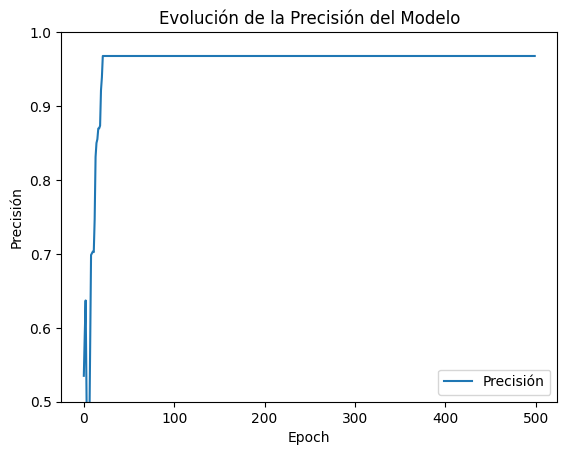

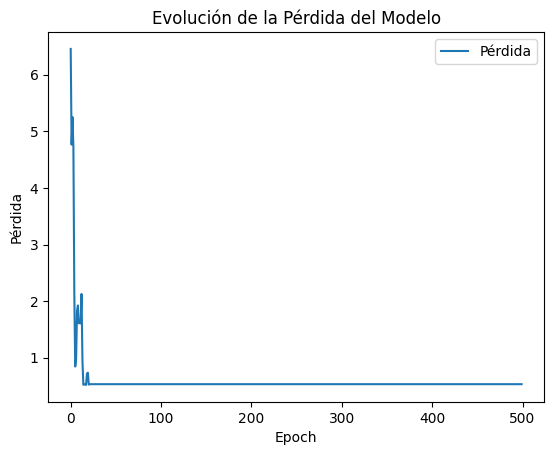

83/83 [==============================] - 0s 1ms/step
[[-0.7260099   1.5158267 ]
 [-0.7260099   1.5158267 ]
 [-0.1854021   0.8707205 ]
 ...
 [-0.1854021   0.8707205 ]
 [-0.1854021   0.8707205 ]
 [-0.18540233  0.87072057]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


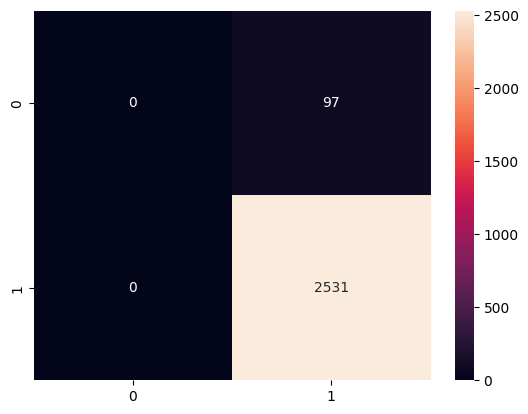

In [71]:
construirRedNeuronalRegresion("/content/SeoulBikeData.csv",'tanh', 'adam')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 20)                340       
                                                                 
 dense_15 (Dense)            (None, 2)                 42        
                                                                 
Total params: 382 (1.49 KB)
Trainable params: 382 (1.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<ipython-input-34-b74b7ad11b74>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframe['Date'] = pd.to_datetime(dataframe['Date'], dayfirst=False)


192/192 [==============================] - 0s 2ms/step - loss: 2.4393 - accuracy: 0.9677


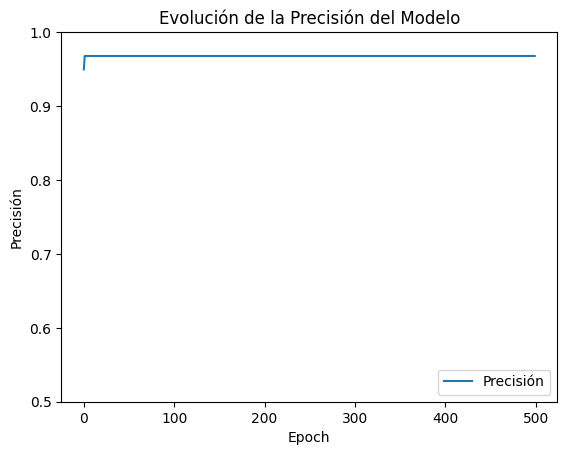

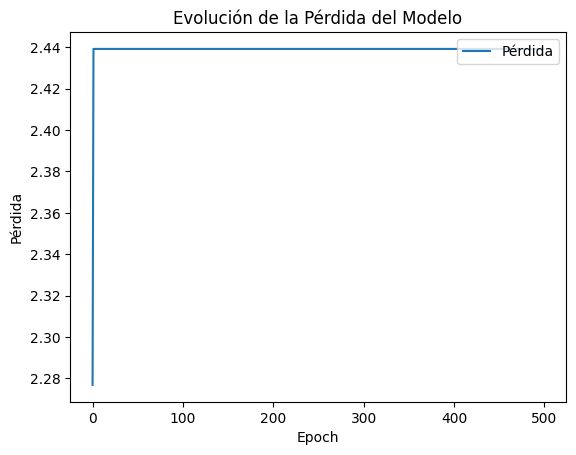

83/83 [==============================] - 0s 1ms/step
[[-0.19983849  1.5750002 ]
 [-0.3629954   1.3074048 ]
 [-0.19983849  1.5750002 ]
 ...
 [-0.44487262  1.2322023 ]
 [-0.19983849  1.5750002 ]
 [-1.6299741   0.64606225]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


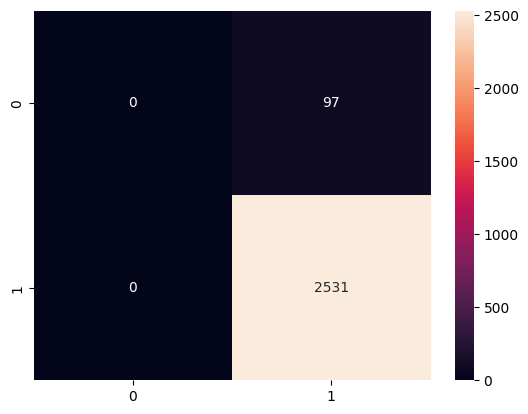

In [72]:
construirRedNeuronalRegresion("/content/SeoulBikeData.csv",'tanh', 'SGD')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                340       
                                                                 
 dense_17 (Dense)            (None, 2)                 42        
                                                                 
Total params: 382 (1.49 KB)
Trainable params: 382 (1.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<ipython-input-34-b74b7ad11b74>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframe['Date'] = pd.to_datetime(dataframe['Date'], dayfirst=False)


192/192 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.9677


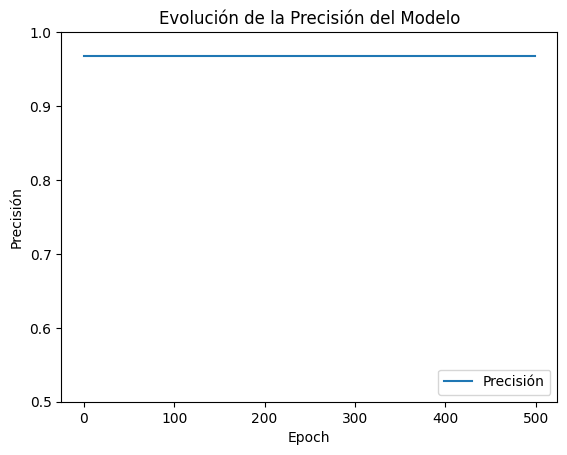

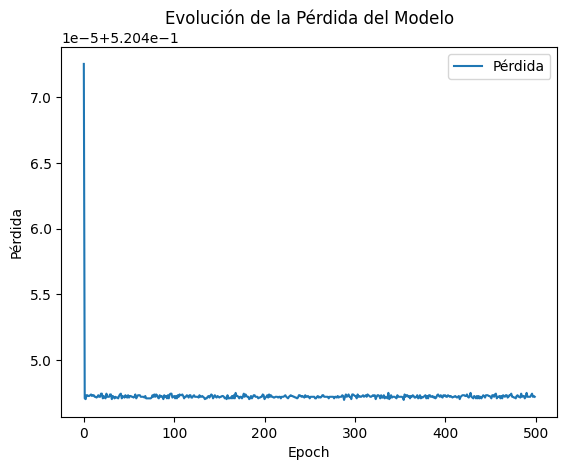

83/83 [==============================] - 0s 1ms/step
[[-569.7751   774.2673 ]
 [-544.4131   885.6727 ]
 [-615.0633  1041.6843 ]
 ...
 [-596.75024 1076.954  ]
 [-601.098    844.65564]
 [-481.58908 1327.2454 ]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


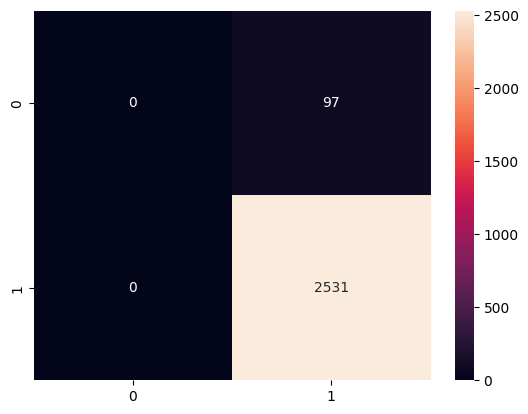

In [73]:
construirRedNeuronalRegresion("/content/SeoulBikeData.csv",'ReLU', 'RMSprop')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                340       
                                                                 
 dense_19 (Dense)            (None, 2)                 42        
                                                                 
Total params: 382 (1.49 KB)
Trainable params: 382 (1.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<ipython-input-34-b74b7ad11b74>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframe['Date'] = pd.to_datetime(dataframe['Date'], dayfirst=False)


192/192 [==============================] - 0s 2ms/step - loss: 2.8166 - accuracy: 0.5015


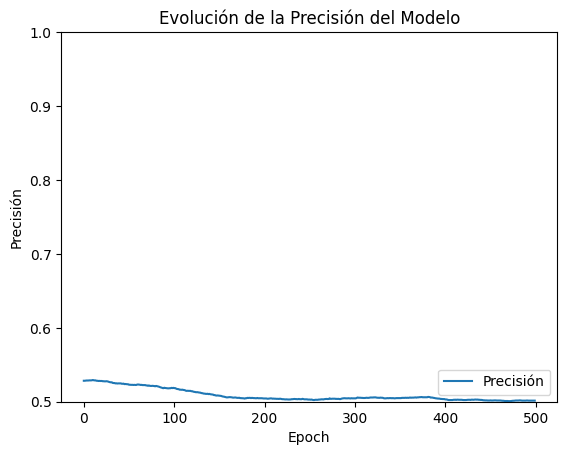

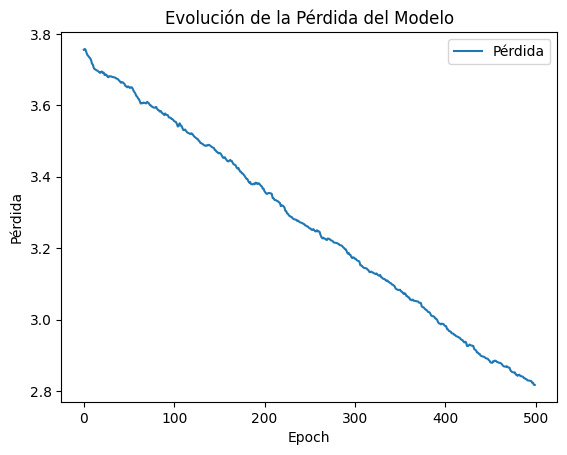

83/83 [==============================] - 0s 1ms/step
[[ -97.98147   300.57224 ]
 [ -70.74874   235.73802 ]
 [-109.968094   30.551262]
 ...
 [-154.83089   -93.963524]
 [-125.04696   249.85579 ]
 [ -77.4248   -475.3828  ]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


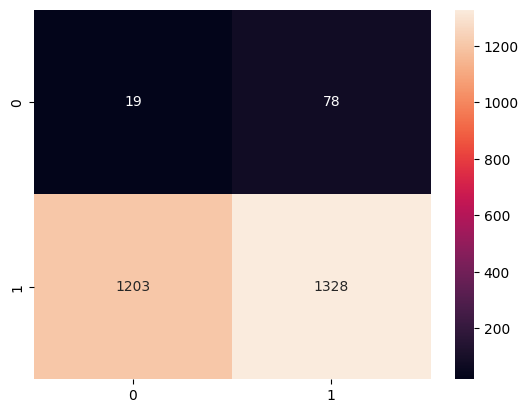

In [74]:
construirRedNeuronalRegresion("/content/SeoulBikeData.csv",'ReLU', 'Adadelta')